In [280]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd


In [281]:
data1= sns.load_dataset('Tips')

In [282]:
data1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [283]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [284]:
Conclusion:
--No missing entries in the dataset
--The numerical columns are total_bill,tip and size
--The categorical columns are sex,smoker,day,time

SyntaxError: invalid syntax (1842288558.py, line 1)

## UNIVARIATE ANALYSIS:

In [285]:
cat_cols= [x for x in data1.columns if data1[x].dtypes=='O']

In [286]:
cat_cols

['sex', 'smoker', 'day', 'time']

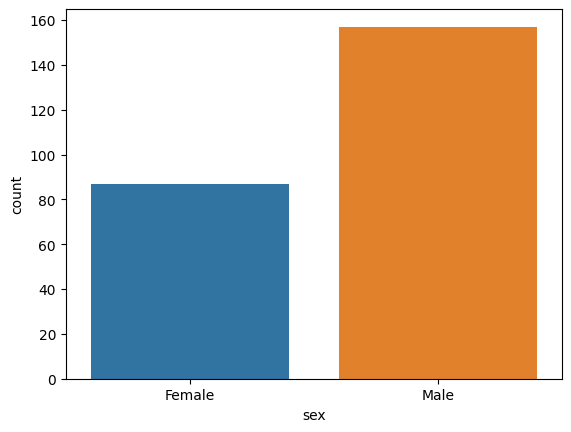

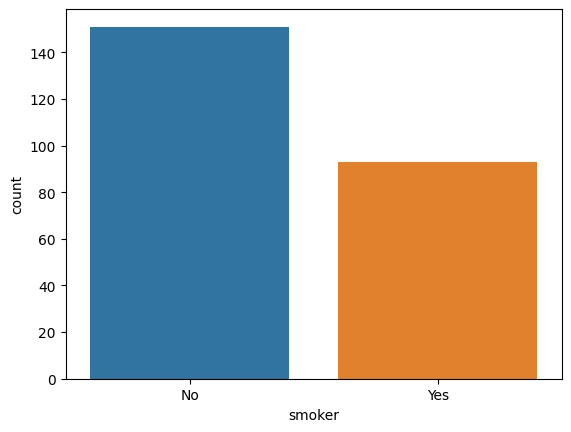

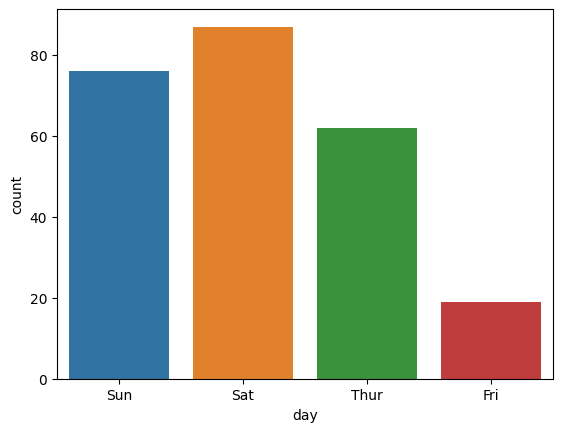

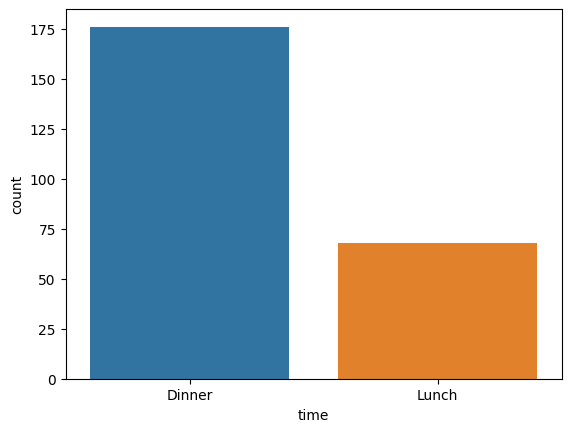

In [287]:
for k in cat_cols:
    sns.countplot(data=data1,x=k)
    plt.show()


# numerical columns:

In [288]:
numerica= [j for j in data1.columns if data1[j].dtypes!='O']
numerica.pop(1)

'tip'

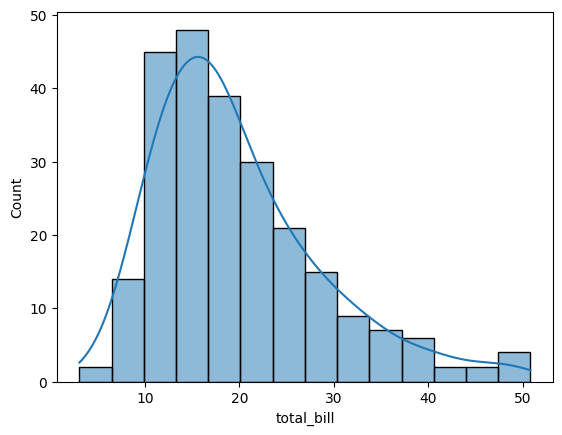

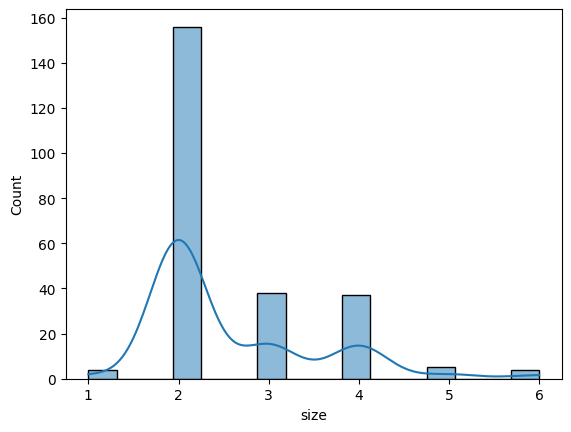

In [289]:
for i in numerica:
    sns.histplot(data1[i],kde=True)
    plt.show()

In [290]:
data1['total_bill'].skew()
#skewness is above 0.5 that is it is not a normal distribution (right skewed data)

1.1332130376158205

In [291]:
data1['tip'].skew()

1.4654510370979401

# Multivariate ANALYSIS

<Axes: xlabel='total_bill', ylabel='tip'>

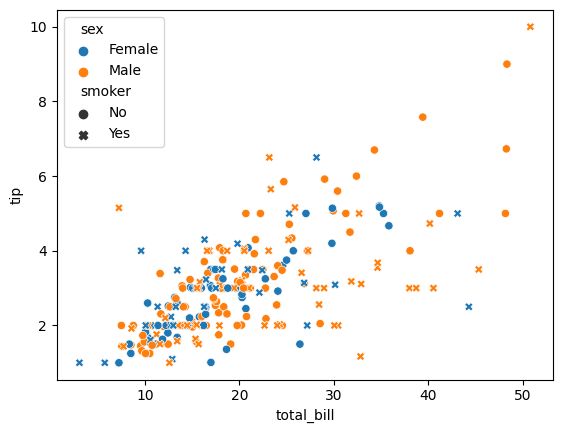

In [292]:
sns.scatterplot(x=data1['total_bill'],y= data1['tip'],hue=data1['sex'],style=data1['smoker'])

<Axes: xlabel='size', ylabel='tip'>

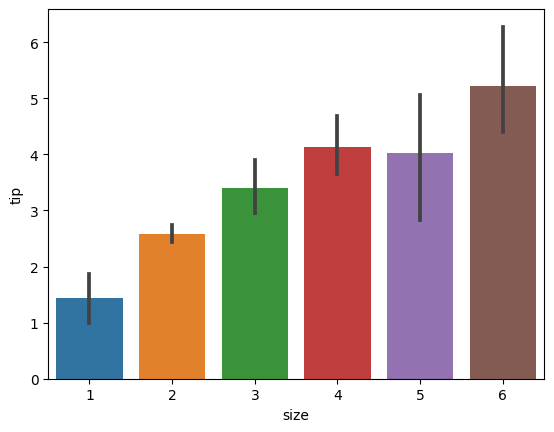

In [293]:
sns.barplot(data=data1,x=data1['size'],y=data1['tip'])

In [294]:
px.pie(data_frame=data1,values='tip',names='day',hole=0.4)

<Axes: >

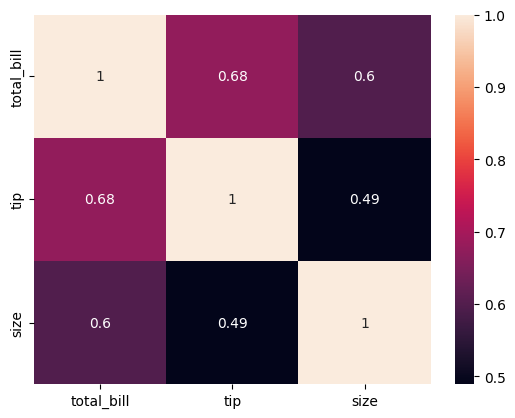

In [295]:
numeric_data = data1.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(),annot=True)

## Check for outliers:

<Axes: >

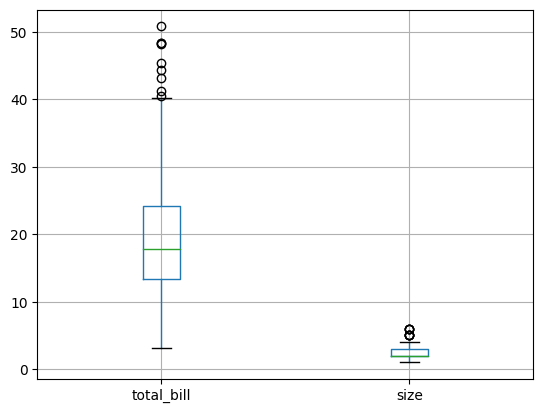

In [296]:
data1[numerica].boxplot()  #Many No of outliers

# FOR TOTAL BILL:

In [297]:
#IQR:
Q1= data1['total_bill'].quantile(0.25)
Q3= data1['total_bill'].quantile(0.75)

In [298]:
IQR= Q3-Q1

In [299]:
upper_limit=Q3+(1.5*IQR)
lower_limit= Q1-(1.5*IQR)

In [300]:
upper_limit

40.29749999999999

In [301]:
data1[data1['total_bill']>upper_limit]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [302]:
data1= data1[data1['total_bill']<upper_limit]

# FOR SIZE

In [303]:
#IQR:
q1= data1['size'].quantile(0.25)
q3= data1['size'].quantile(0.75)

In [304]:
q3

3.0

In [305]:
data1.describe()

,total_bill,tip,size
count,235.000000,235.000000,235.000000
mean,18.798681,2.901489,2.523404
std,7.438468,1.225651,0.911984
min,3.070000,1.000000,1.000000
25%,13.215000,2.000000,2.000000
50%,17.460000,2.750000,2.000000
75%,23.135000,3.500000,3.000000
max,40.170000,7.580000,6.000000


In [306]:
iqr=q3-q1
upper_limit_s=q3+(1.5*iqr)
lower_limit_s= q1-(1.5*iqr)

In [307]:
upper_limit_s

4.5

In [308]:
data1['size']= np.where(data1['size']>upper_limit_s,upper_limit_s,
                               np.where(data1['size']<lower_limit_s,lower_limit_s,data1['size']))

C:\Users\Ammar\AppData\Local\Temp\ipykernel_13812\2076570067.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# OUTLIER REMOVAL DONE!

In [309]:
data1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [310]:
#FEATURE ENGINEERING:

In [311]:
import scipy.stats as stats

C:\Users\Ammar\AppData\Local\Temp\ipykernel_13812\2372060690.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'total_bill QQ plot')

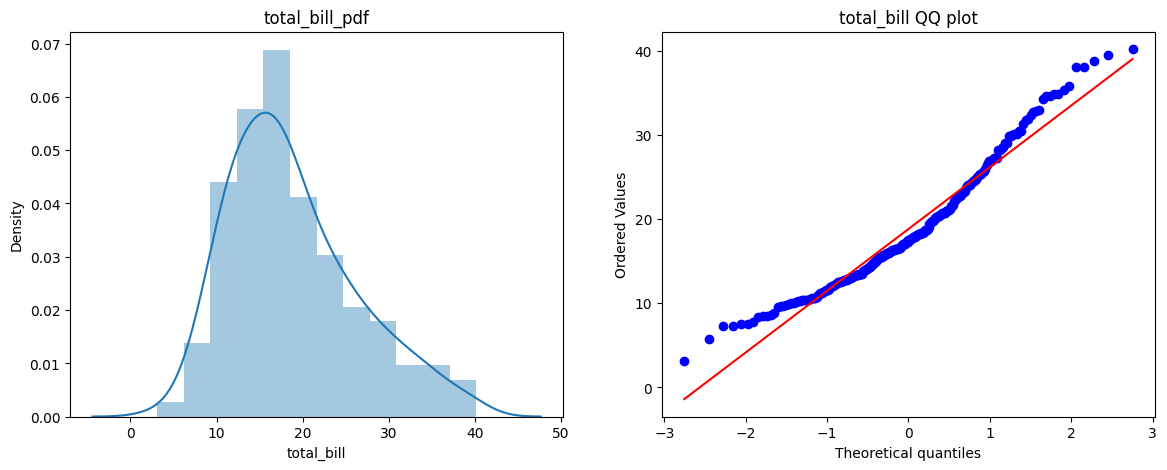

In [312]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.distplot(data1['total_bill'])
plt.title('total_bill_pdf')

plt.subplot(122)
stats.probplot(data1['total_bill'],dist="norm",plot=plt)
plt.title('total_bill QQ plot')

In [323]:
x=data1.drop(columns=['tip'])
y=data1[['tip']]

In [324]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [325]:
X_train.columns

Index(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [326]:
transformer= ColumnTransformer(transformers=[
                    ('trf1',OneHotEncoder(sparse=False,drop='first'),[1,2,3,4])

    
],remainder='passthrough')

In [327]:
X_train=transformer.fit_transform(X_train)
X_test= transformer.transform(X_test)

C:\Users\Ammar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [328]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_transformed= scaler.fit_transform(X_train)
X_test_transformed= scaler.transform(X_test)



In [329]:
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred= lr.predict(X_test_transformed)
r2_score(y_test,y_pred)

0.43443608520170285

In [334]:
np.mean(cross_val_score(lr,X_train_transformed,y_train))

0.2769612834668426

In [331]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.1)
R.fit(X_train_transformed,y_train)
y_pred= R.predict(X_test_transformed)
r2_score(y_test,y_pred)

0.4332494985202976

In [335]:
np.mean(cross_val_score(R,X_train_transformed,y_train))

0.2800662652338858